## What we often do in this use-case
    High level over-view..
    
     Life- Cycle of Data Science Project :
        a) Data collection
        b) Perform Data Cleaning / Data Preparation / Data Pre-processing 
        c) Data visuaslisation(EDA)
        d) Perform feature engineering
            I)  Feature encoding
            II) checking outliers & impute it..
            III)Feature selection or feature importance
            
        e) Build machine leaning model & dump it..
        f) Automate ML Pipeline 

## 1.. Lets read data !

In [1]:
## import necessary packages !

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Importing dataset
    Since data is in form of csv file we have to use pandas read_csv to load the data
    

In [2]:
data=pd.read_csv("Iris.csv")
df=data.copy()

In [3]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## 2.a.. Lets deal with missing values ..


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
## After loading it is important to check null/missing values in a column or a row
## Missing value :  values which occur when no data is recorded for an observation..

df.isnull().sum()

## train_data.isnull().sum(axis=0)
## by-default axis is 0 , ie it computes total missing values column-wise !

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## 2.b.. Lets deal with Duplicate values ..


In [7]:
data_dup=df.drop_duplicates(subset='Species')
data_dup

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [8]:
df.value_counts('Species')

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## 2.c. Perform Data Preprocessing on Species attribute
        Extract the Iris from setosa, versicolor, virginica, from the Species attribute and Update the Column

In [9]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df['Species'][0]

'Iris-setosa'

In [11]:
df['Species'][0].split("-")

['Iris', 'setosa']

In [12]:
df['Species'][0].split("-")[1]

'setosa'

In [13]:
df['Species']=df['Species'].apply(lambda x:x.split("-")[1])

In [14]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


## Data visuaslisation(EDA)


In [15]:
import seaborn as sns

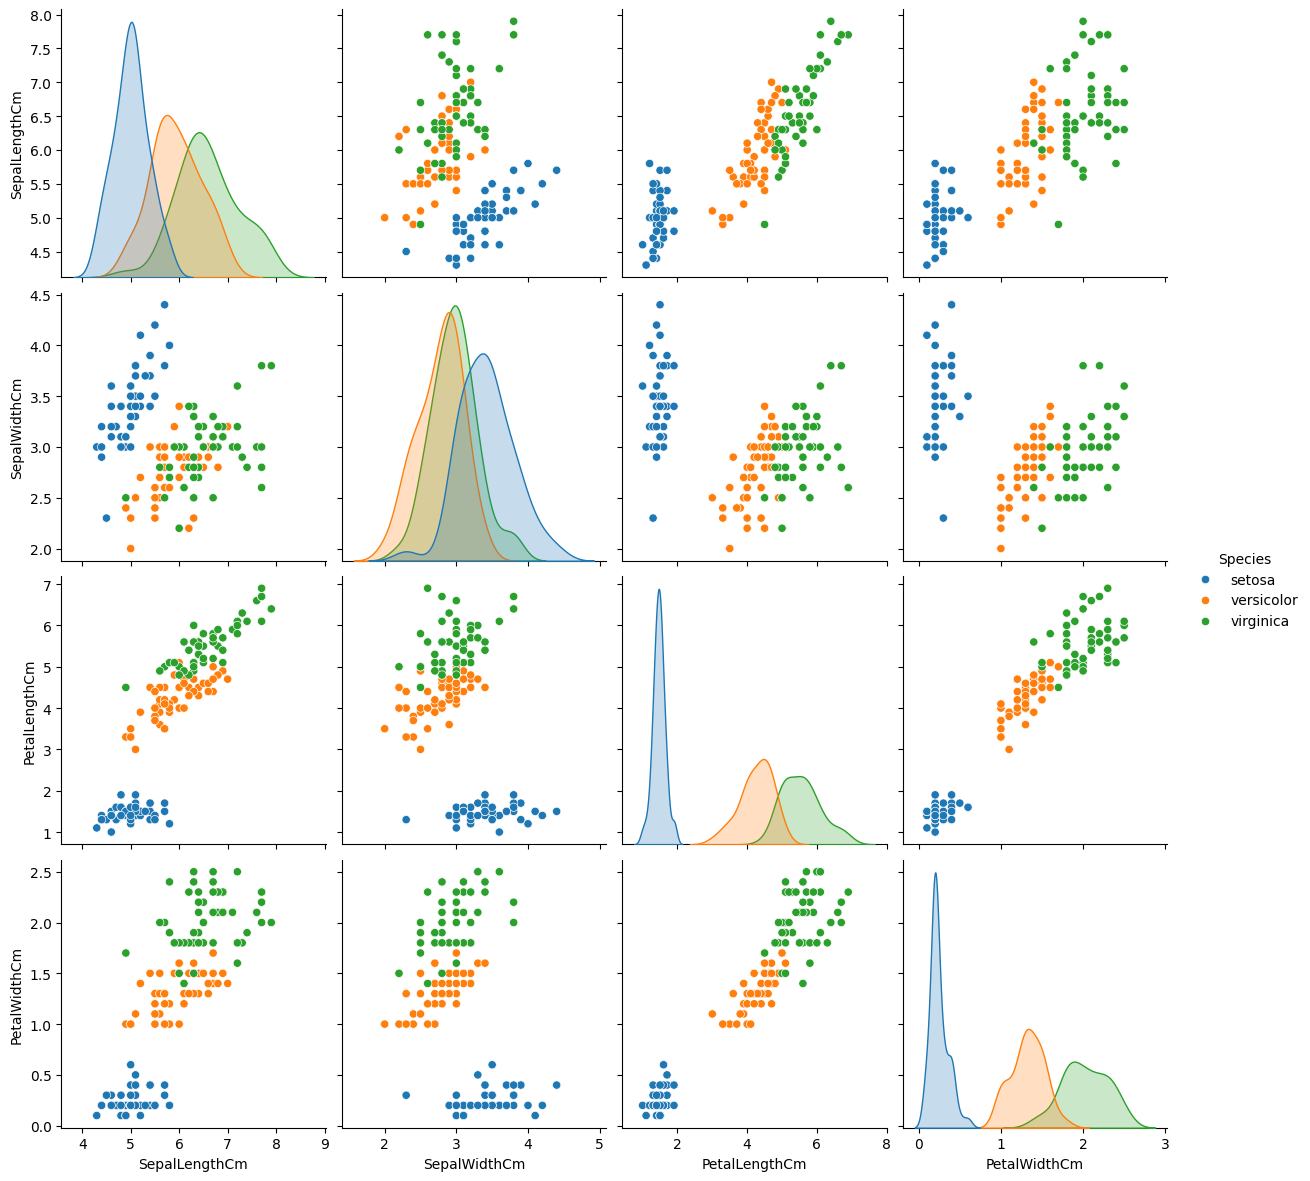

In [16]:
# We can use pairplot for mutivariate analysis:
sns.pairplot(df.drop(['Id'], axis = 1), hue='Species', height=3,)

# OBSERVATION

### From the above plots, we can infer that – 

Species Setosa has smaller sepal lengths but larger sepal widths.
Versicolor Species lies in the middle of the other two species in terms of sepal length and width
Species Virginica has larger sepal lengths but smaller sepal widths.

### From the above plots, we can infer that – 

Species Setosa has smaller petal lengths and widths.
Versicolor Species lies in the middle of the other two species in terms of petal length and width
Species Virginica has the largest of petal lengths and widths.

## Histograms with Distplot Plot
We can see that – 

In the case of Sepal Length, there is a huge amount of overlapping.
In the case of Sepal Width also, there is a huge amount of overlapping.
In the case of Petal Length, there is a very little amount of overlapping.
In the case of Petal Width also, there is a very little amount of overlapping.

## We can see many types of relationships from this plot such as the species Setosa has the smallest of petals widths and lengths. It also has the smallest sepal length but larger sepal widths. Such information can be gathered about any other species.

In [17]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [18]:
def plot_graph(df,col):
  fig, (ax1,ax2,ax3)= plt.subplots(3,1)
  sns.distplot(df[col],ax=ax1)
  sns.boxplot(df[col],ax=ax2,orient='h')
  sns.distplot(df[col],ax=ax3,kde=False)


C:\Users\aarsh\AppData\Local\Temp\ipykernel_1940\406209855.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax1)
C:\Users\aarsh\AppData\Local\Temp\ipykernel_1940\406209855.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax3,kde=False)
C:\Users\aarsh\AppData\Local\Tem

None
None


C:\Users\aarsh\AppData\Local\Temp\ipykernel_1940\406209855.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax3,kde=False)
C:\Users\aarsh\AppData\Local\Temp\ipykernel_1940\406209855.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax1)
C:\Users\aarsh\AppData\Local\Tem

None
None


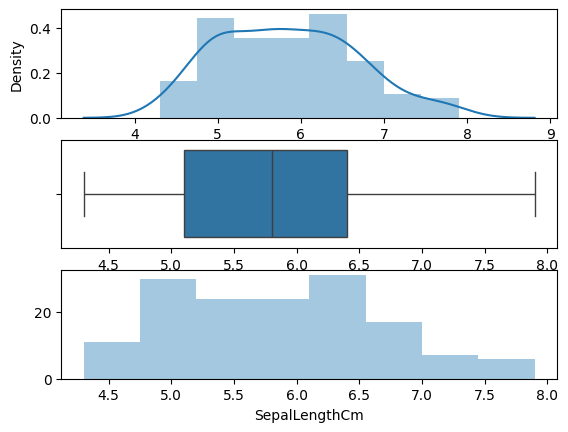

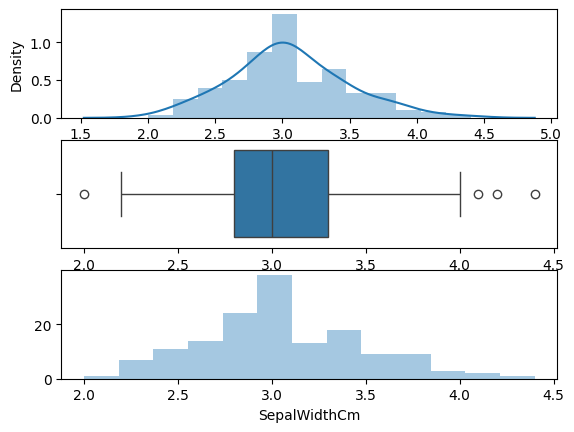

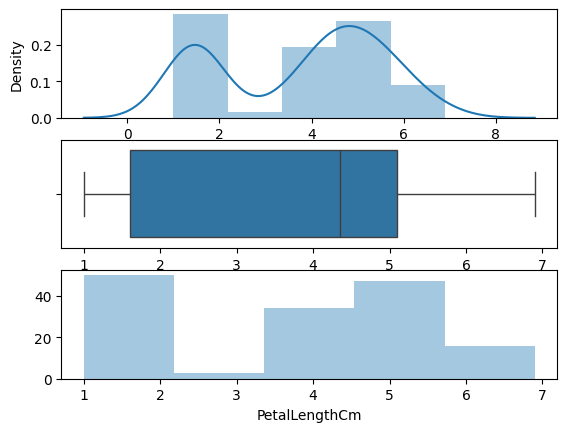

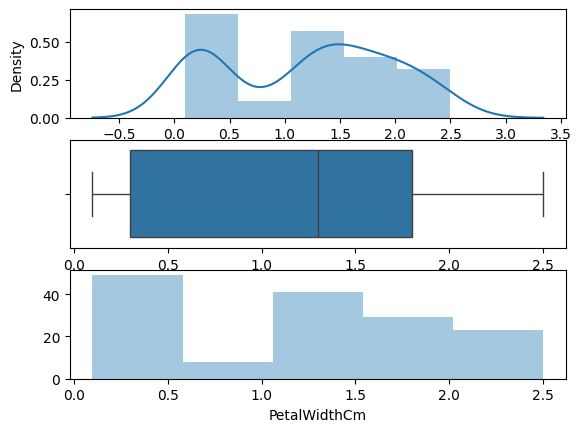

In [19]:
print(plot_graph(df,'SepalLengthCm'))
print(plot_graph(df,'SepalWidthCm'))
print(plot_graph(df,'PetalLengthCm'))
print(plot_graph(df,'PetalWidthCm'))

# OBSERVATION

From the above plot, we can see that – 

The highest frequency of the sepal length is between 30 and 35 which is between 5.5 and 6.
The highest frequency of the sepal Width is around 70 which is between 3.0 and 3.5.
The highest frequency of the petal length is around 50 which is between 1 and 2.
The highest frequency of the petal width is between 40 and 50 which is between 0.0 and 0.5.

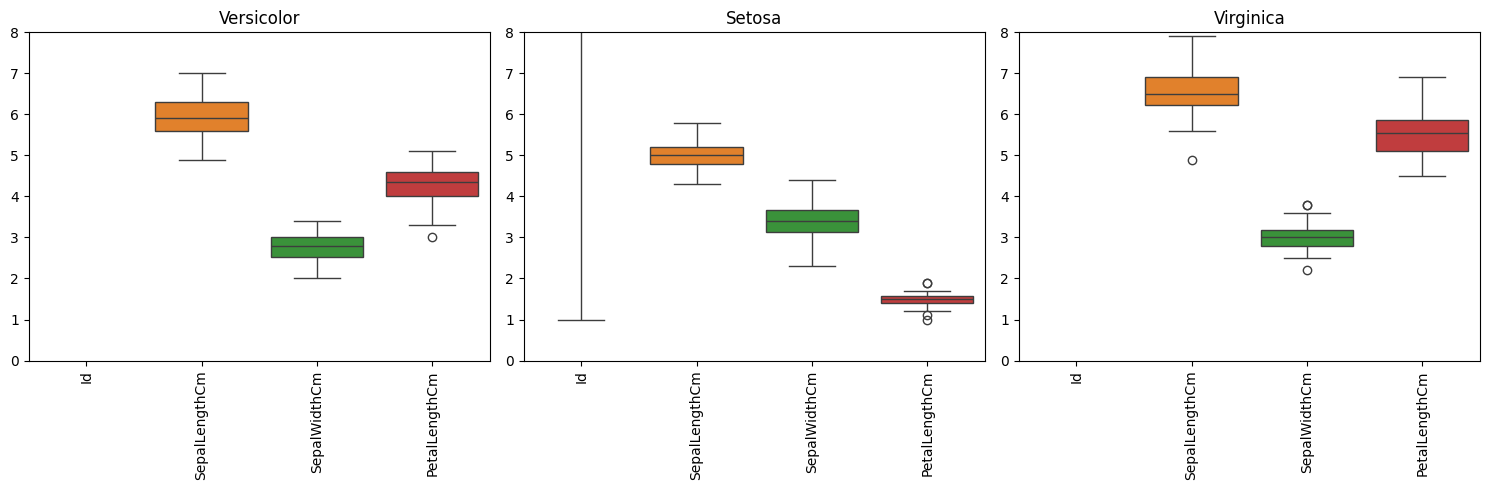

In [20]:
irisVer = df[df['Species'] == "versicolor"]
irisSet = df[df['Species'] == "setosa"]
irisVir = df[df['Species'] == "virginica"]

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Boxplot for Versicolor
sns.boxplot(data=irisVer.iloc[:, :4], ax=axes[0], )
axes[0].set_title('Versicolor')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels
axes[0].set_ylim(0, 8)

# Boxplot for Setosa
sns.boxplot(data=irisSet.iloc[:, :4], ax=axes[1])
axes[1].set_title('Setosa')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

axes[1].set_ylim(0, 8)

# Boxplot for Virginica
sns.boxplot(data=irisVir.iloc[:, :4], ax=axes[2])
axes[2].set_title('Virginica')
axes[2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

axes[2].set_ylim(0, 8)

# Adjust layout
plt.tight_layout()
plt.show()

## OBSERVATION

We can see that – 

Species Setosa has the smallest features and less distributed with some outliers.
Species Versicolor has the average features.
Species Virginica has the highest features

## Handling Correlation

In [21]:
df.drop('Id',axis=1,inplace=True)

In [22]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
numeric_columns = df.select_dtypes(include=[float, int]).columns
df_numeric = df[numeric_columns]

# Calculate correlation
corr = df_numeric.corr(method='pearson')
print(corr)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


## Heatmaps
The heatmap is a data visualization technique that is used to analyze the dataset as colors in two dimensions. Basically, it shows a correlation between all numerical variables in the dataset. In simpler terms, we can plot the above-found correlation using the heatmaps.

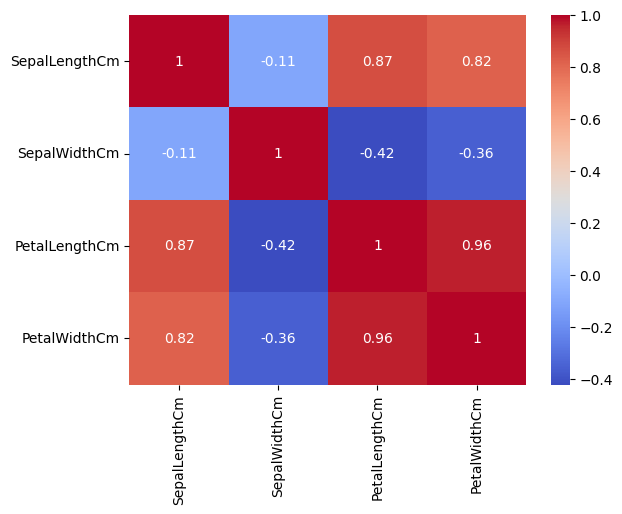

In [24]:
sns.heatmap(df_numeric.corr(method='pearson'),
            annot = True,cmap='coolwarm');
 
plt.show()

## OBSERVATION

We can see that –

Petal width and petal length have high correlations. 
Petal length and sepal width have good correlations.
Petal Width and Sepal length have good correlations.

# Feature Engineering 

### 1.  Handling Outliers

In [25]:
def outliers_handling_function(df,col):
    #IQR Approach(Interquartile Range):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    maxi=q3+(1.5*iqr)
    mini=q1-(1.5*iqr)
    print("Maxi: ",maxi)
    print("Mini: ",mini)
    print("Lenght of outliers: ",len([c for c in df[col] if c>=maxi or c<=mini]))

    If Features Are Skewed We Use the below Technique which is IQR
    Data which are greater than IQR +1.5 IQR and data which are below than IQR - 1.5 IQR are my outliers
    where ,  IQR = 75th%ile data - 25th%ile data
     
     & IQR +- 1.5 IQR  will be changed depending upon the domain ie it could be sometimes IQR +- 3IQR 

In [26]:
df.columns


Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [27]:
print("Sepal_length")
outliers_handling_function(df,'SepalLengthCm')
print("\nSepal_Width")
outliers_handling_function(df,'SepalWidthCm')
print("\nPetal_length")
outliers_handling_function(df,'PetalLengthCm')
print("\nPetal_Width")
outliers_handling_function(df,'PetalWidthCm')

Sepal_length
Maxi:  8.350000000000001
Mini:  3.1499999999999986
Lenght of outliers:  0

Sepal_Width
Maxi:  4.05
Mini:  2.05
Lenght of outliers:  4

Petal_length
Maxi:  10.349999999999998
Mini:  -3.649999999999999
Lenght of outliers:  0

Petal_Width
Maxi:  4.05
Mini:  -1.95
Lenght of outliers:  0


<Axes: xlabel='SepalWidthCm'>

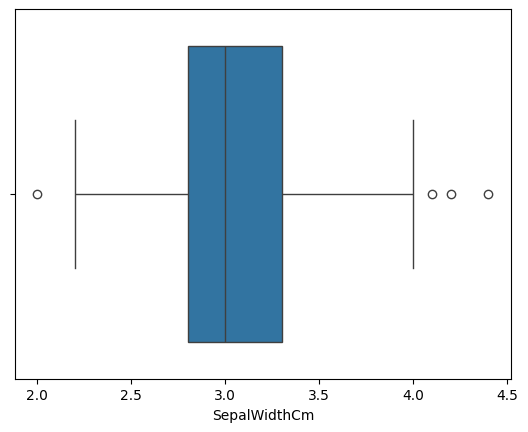

In [28]:
sns.boxplot(x='SepalWidthCm', data=df)


In [29]:
df["SepalWidthCm"].median()

3.0

In [30]:
df['SepalWidthCm']=np.where(df['SepalWidthCm']>=4.05,df['SepalWidthCm'].median(),df['SepalWidthCm'])
df['SepalWidthCm']=np.where(df['SepalWidthCm']<=2.05,df['SepalWidthCm'].median(),df['SepalWidthCm'])

In [31]:
print("Sepal_Width")
outliers_handling_function(df,'SepalWidthCm')

Sepal_Width
Maxi:  4.05
Mini:  2.05
Lenght of outliers:  0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### 2.  Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [35]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.036000,3.758667,1.198667
std,0.828066,0.389851,1.764420,0.763161
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [36]:
df['Species']=le.fit_transform(df['Species'])
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


### 3.  Feature Extraction

In [37]:
def get_plot(data,feature):
    plt.figure(figsize=(5,5))
    sns.violinplot(x='Species' , y=feature , data=data )

    plt.show()

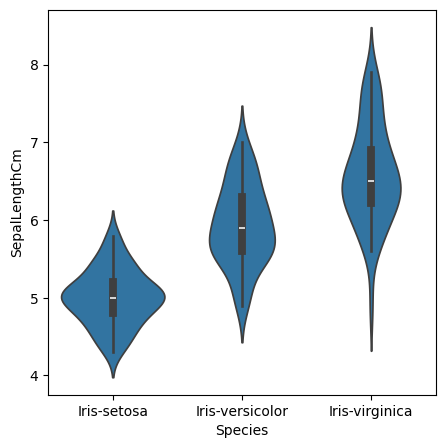

None


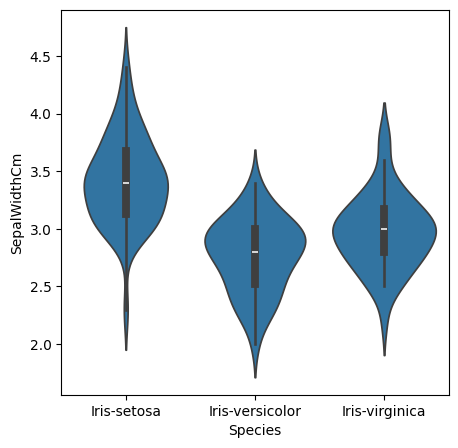

None


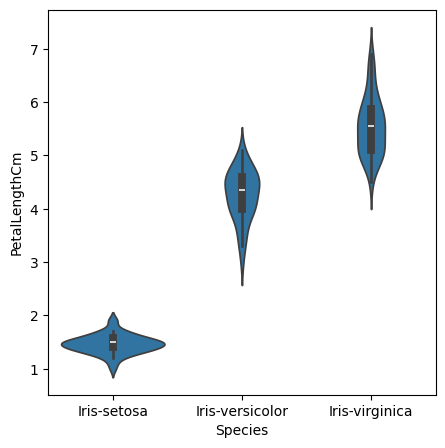

None


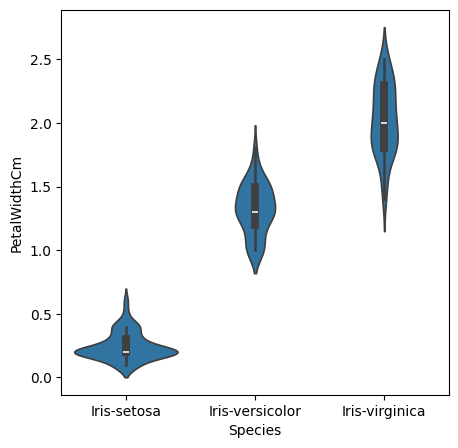

None


In [38]:
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'] 
for feature in features:
    print(get_plot(data,feature))

# Observation

1.  Feature 'SepalLengthCm' is not a interesting feature upto some extent in determining the Species
2.  Feature 'SepalWidthCm' is not a interesting feature upto some extent in determining the Species
3.  Feature 'PetalLengthCm' is a interesting feature upto some extent in determining the Species
4.  Feature 'PetalWidthCm' is a interesting feature upto some extent in determining the Species

# Build Manchine Learning Model

#### split dataset into train & test

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X=df.drop(columns=['Species'])
Y=df['Species']
X.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [41]:
X_new=df[['PetalLengthCm','PetalWidthCm']]
X_new

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=0.25)

In [43]:
X_new.shape

(150, 2)

In [44]:
Y.shape

(150,)

In [45]:
Y.unique()

array([0, 1, 2])

## Models:
#### 1. Logistic Regression
#### 2. Decision Tree
#### 3. Random Forest

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
model_L=LogisticRegression(multi_class='multinomial')
model_D=DecisionTreeClassifier(max_depth=8)
model_R=RandomForestRegressor()

## 1. Logistic Regression

In [47]:
model_L.fit(X_train,Y_train)

LogisticRegression(multi_class='multinomial')

In [48]:
y_pred_L=model_L.predict(X_test)

In [49]:
y_pred_L

array([0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 2, 0, 1, 2])

In [50]:
print(Y_test)

30     0
111    2
127    2
105    2
29     0
36     0
23     0
98     1
101    2
144    2
119    2
14     0
130    2
10     0
68     1
106    2
52     1
44     0
133    2
32     0
51     1
72     1
7      0
53     1
58     1
94     1
17     0
93     1
73     1
149    2
21     0
22     0
75     1
56     1
120    2
1      0
76     1
139    2
Name: Species, dtype: int32


In [51]:
len(y_pred_L)

38

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
print(classification_report(Y_test,y_pred_L))
print("Accuracy: ",model_L.score(X_test,Y_test)*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.81      1.00      0.90        13
           2       1.00      0.75      0.86        12

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.94      0.92      0.92        38

Accuracy:  92.10526315789474


### 2. Decision Tree Classifier

In [54]:
model_D.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=8)

In [55]:
y_pred_D=model_D.predict(X_test)

In [56]:
print(classification_report(Y_test,y_pred_D))
print("Accuracy: ",model_D.score(X_test,Y_test)*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.81      1.00      0.90        13
           2       1.00      0.75      0.86        12

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.94      0.92      0.92        38

Accuracy:  92.10526315789474


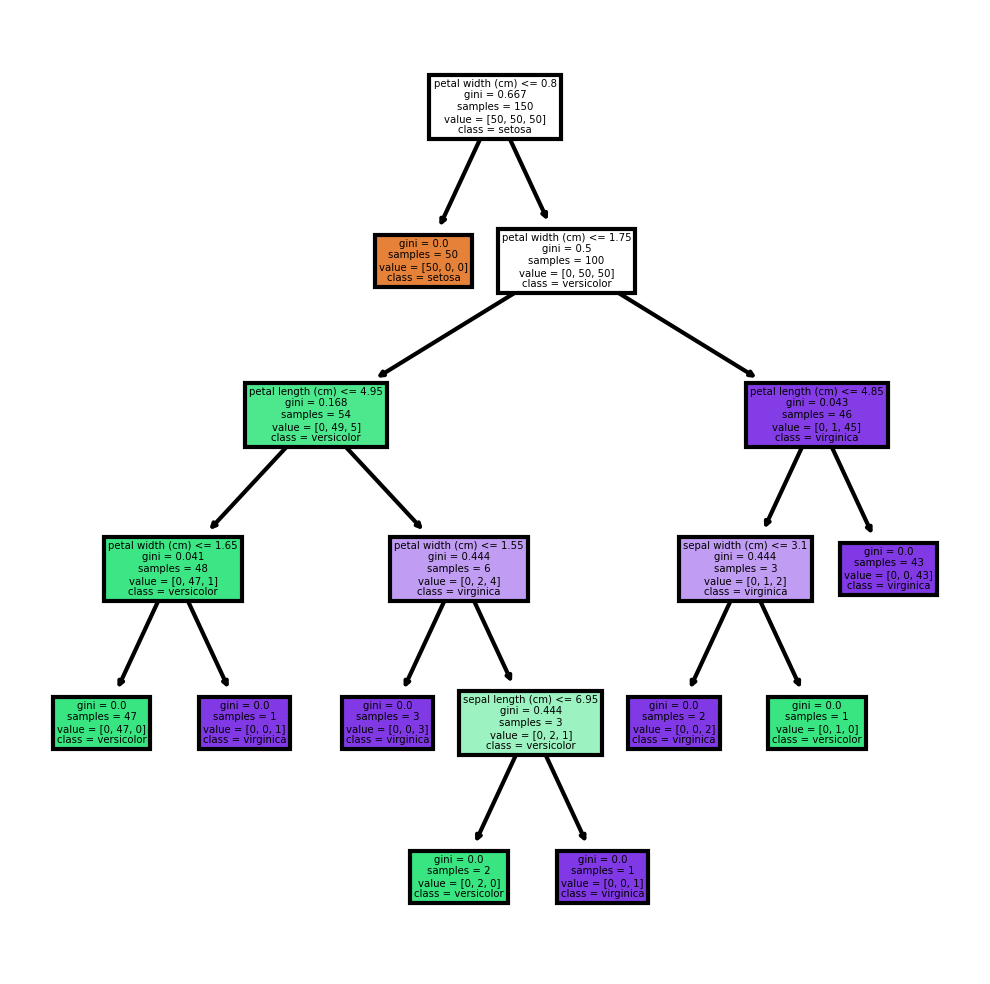

In [57]:
from sklearn import tree

# Assuming model_D is your decision tree model and X, Y are your feature matrix and target variable
model_D.fit(X, Y)

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

# Setting dpi = 300 to make image clearer than default
fig1, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(model_D,
           feature_names = fn, 
           class_names=cn,
           filled = True);

# You can save your plot if you want
fig1.savefig('imagename.png')

### 3. Random Forest Regressor

In [58]:
model_R.fit(X_train,Y_train)

RandomForestRegressor()

In [59]:
y_pred_R=model_R.predict(X_test)

In [60]:
print("Accuracy: ",model_R.score(X_test,Y_test)*100)

Accuracy:  91.84589786661962


# How to automate ML pipeline


'''

    Lets automate all the stuffs..
    let say ,I will just pass ml algo & i get several results like--
    
    Training score, predictions, r2_score, mse, mae, rmse, distribution of error


'''

In [61]:
from sklearn import metrics

In [62]:
def predict(ml_model):
    model = ml_model.fit(X_train , Y_train)
    print('Training score : {}'.format(model.score(X_train , Y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(Y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(Y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(Y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(Y_test , y_predection))))
    sns.distplot(Y_test - y_predection)

Training score : 0.9874625222201434
predictions are : [0.         2.         1.95745238 2.         0.         0.
 0.         1.         1.99428571 2.         1.18       0.
 2.         0.         1.         1.07758333 1.178      0.
 1.25       0.         1.         1.178      0.         1.
 1.         1.         0.         1.         1.         1.99428571
 0.         0.         1.         1.01       2.         0.
 1.16183333 2.        ]


r2 score : 0.9128167825629198
MAE : 0.08090068922305765
MSE : 0.057297003703455064
RMSE : 0.23936792538570215


C:\Users\aarsh\AppData\Local\Temp\ipykernel_1940\455644951.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test - y_predection)


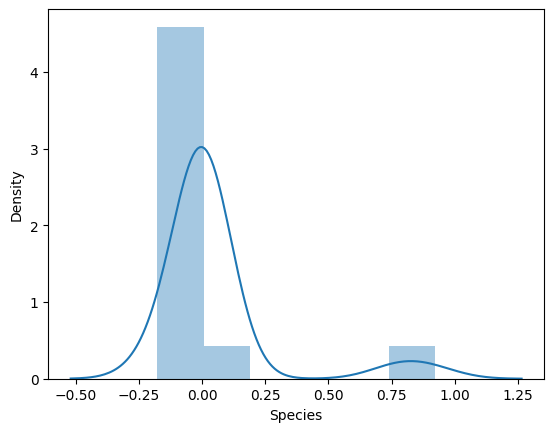

In [63]:
predict(RandomForestRegressor())

In [64]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.9911100527840616
predictions are : [0. 2. 2. 2. 0. 0. 0. 1. 2. 2. 1. 0. 2. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 2. 0. 0. 1. 1. 2. 0. 1. 2.]


r2 score : 0.8798735511064278
MAE : 0.07894736842105263
MSE : 0.07894736842105263
RMSE : 0.28097574347450816


C:\Users\aarsh\AppData\Local\Temp\ipykernel_1940\455644951.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test - y_predection)


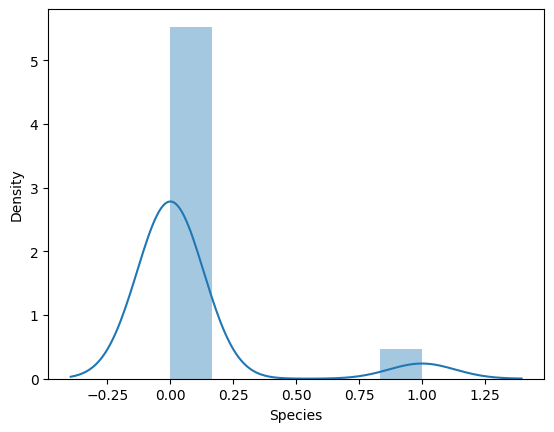

In [65]:
predict(DecisionTreeRegressor())